# Import des données et exploration

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [102]:
csv_path = "archive/shot_logs.csv"  
df = pd.read_csv(csv_path, encoding='utf-8')

In [103]:
df.head()


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


| **Nom de la colonne**          | **Description**                                                                                                |
| ------------------------------ | -------------------------------------------------------------------------------------------------------------- |
| **SHOT_CLOCK**                 | Temps restant sur l’horloge des tirs (en secondes) au moment du tir. Peut être manquant sur certaines actions. |
| **MATCHUP**                    | Indique le match joué, souvent sous la forme `"LAL vs GSW"` ou `"GSW @ LAL"`.                                  |
| **LOCATION**                   | Désigne si l’équipe du joueur jouait à domicile (`HOME`) ou à l’extérieur (`AWAY`).                            |
| **W**                          | Résultat final du match pour l’équipe du joueur : `W` = victoire, `L` = défaite.                               |
| **GAME_ID**                    | Identifiant unique du match dans la base de données NBA.                                                       |
| **FINAL_MARGIN**               | Écart de points final du match (positif = victoire, négatif = défaite).                                        |
| **SHOT_NUMBER**                | Numéro d’ordre du tir tenté par le joueur dans le match (1er tir, 2e tir, etc.).                               |
| **PERIOD**                     | Quart-temps dans lequel le tir a eu lieu (1 à 4, parfois plus pour les prolongations).                         |
| **GAME_CLOCK**                 | Temps restant dans le quart-temps au moment du tir (format `MM:SS`).                                           |
| **DRIBBLES**                   | Nombre de dribbles effectués par le joueur avant de tirer.                                                     |
| **TOUCH_TIME**                 | Durée (en secondes) pendant laquelle le joueur a eu la balle avant de tirer.                                   |
| **SHOT_DIST**                  | Distance du tir par rapport au panier (en pieds).                                                              |
| **PTS_TYPE**                   | Type de tir : `2` pour un tir à 2 points, `3` pour un tir à 3 points.                                          |
| **SHOT_RESULT**                | Résultat du tir : `"Made"` = réussi, `"Missed"` = raté.                                                        |
| **CLOSEST_DEFENDER**           | Nom du défenseur le plus proche au moment du tir.                                                              |
| **CLOSEST_DEFENDER_PLAYER_ID** | Identifiant du défenseur le plus proche.                                                                       |
| **CLOSE_DEF_DIST**             | Distance (en pieds) entre le tireur et le défenseur le plus proche.                                            |
| **FGM**                        | *Field Goal Made* : 1 si le tir est marqué, 0 sinon.                                                           |
| **PTS**                        | Nombre de points marqués sur l’action (0, 2 ou 3).                                                             |
| **player_name**                | Nom du joueur qui a tenté le tir.                                                                              |
| **player_id**                  | Identifiant unique du joueur dans la base NBA.                                                                 |


In [104]:
print("shape :" ,df.shape)
print(df.dtypes)


shape : (128069, 21)
GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object


In [105]:
print("\n=== VALEURS MANQUANTES ===")
na_counts = df.isna().sum()
na_pct = (na_counts / len(df)) * 100
na_summary = pd.DataFrame({'missing': na_counts, 'missing_%': na_pct.round(2)})
print(na_summary.sort_values(by='missing_%', ascending=False))
print()
print(df['SHOT_RESULT'].value_counts())


=== VALEURS MANQUANTES ===
                            missing  missing_%
SHOT_CLOCK                     5567       4.35
MATCHUP                           0       0.00
LOCATION                          0       0.00
W                                 0       0.00
GAME_ID                           0       0.00
FINAL_MARGIN                      0       0.00
SHOT_NUMBER                       0       0.00
PERIOD                            0       0.00
GAME_CLOCK                        0       0.00
DRIBBLES                          0       0.00
TOUCH_TIME                        0       0.00
SHOT_DIST                         0       0.00
PTS_TYPE                          0       0.00
SHOT_RESULT                       0       0.00
CLOSEST_DEFENDER                  0       0.00
CLOSEST_DEFENDER_PLAYER_ID        0       0.00
CLOSE_DEF_DIST                    0       0.00
FGM                               0       0.00
PTS                               0       0.00
player_name                     

In [106]:
#pourquoi shot_clock a parfois des valuers manquantes ? 

#h1 se sont les fautes (lancés frants) ou quel cas on devrais avoir de pts_types a 1 (faux)
df[df['SHOT_CLOCK'].isna()]['PTS_TYPE'].value_counts()

PTS_TYPE
2    3321
3    2246
Name: count, dtype: int64

In [107]:
#h2 en debut de matach ? 
df[df['SHOT_CLOCK'].isna()]['PERIOD'].value_counts()

PERIOD
1    1578
2    1503
4    1182
3    1179
5     103
6      19
7       3
Name: count, dtype: int64

In [108]:
df[df['SHOT_CLOCK'].isna()]['GAME_CLOCK'].value_counts()

GAME_CLOCK
0:01     849
0:02     525
0:00     480
0:03     385
0:04     273
        ... 
11:52      1
2:57       1
10:56      1
0:42       1
10:42      1
Name: count, Length: 680, dtype: int64

majoritairement dans les  24 dernières secondes mais  il ya quand même des valeurs plus tard dans la période donc pas de conclusion possible 

In [109]:
missing_shot_clock = df[df['SHOT_CLOCK'].isna()]
print(missing_shot_clock[['PTS_TYPE', 'SHOT_DIST', 'SHOT_RESULT']].head(10))


     PTS_TYPE  SHOT_DIST SHOT_RESULT
2           2       10.1      missed
24          3       25.2      missed
54          3       34.4      missed
76          2       13.1        made
129         2       12.0      missed
134         2       17.9      missed
141         2       10.4        made
145         2       18.3      missed
184         3       27.1      missed
204         3       32.9      missed


In [110]:
#TODO pour l'instant drop mais on verra plus tard si on trouve pourquoi c'est manquant
df = df.dropna(subset=['SHOT_CLOCK'])

In [ ]:

#TODO mettre le game clock en temps complet prendre la periode (1,2,3,4) 1 quart temps = 12 min 
# additionne apres avec game_clock 
#drop ensuite period
#a refaore 

# --- Convertir GAME_CLOCK en secondes ---
def clock_to_seconds(clock_str):
    """Convertit une chaîne 'MM:SS' en secondes."""
    if isinstance(clock_str, str):
        minutes, seconds = map(int, clock_str.split(':'))
        return minutes * 60 + seconds
    return None

df['GAME_CLOCK_SEC'] = df['GAME_CLOCK'].apply(clock_to_seconds)

# --- Calculer le temps absolu depuis le début du match ---
# Chaque période dure 12 minutes = 720 secondes
df['GAME_TIME_TOTAL'] = (df['PERIOD'] - 1) * 720 + (720 - df['GAME_CLOCK_SEC'])

df[['GAME_TIME_TOTAL']].head()


,GAME_TIME_TOTAL
0,651
1,706
3,733
4,806
5,945


In [113]:
print(df['GAME_TIME_TOTAL'].value_counts())

GAME_TIME_TOTAL
14      79
1406    77
1407    77
1408    76
1455    75
        ..
3389     1
4879     1
4096     1
4170     1
4896     1
Name: count, Length: 3291, dtype: int64


In [ ]:
#on one hot code les collonnes interresantes et drop le non intéressantes 
df['SHOT_RESULT'] = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})
df['LOCATION'] = df['LOCATION'].map({'H': 1, 'A': 0}) #home = 1 et away = 0

df = df.drop([
    'MATCHUP',
    'W',
    'GAME_ID',
    'CLOSEST_DEFENDER',
    'CLOSEST_DEFENDER_PLAYER_ID',
    'FGM',
    'PTS',
    'player_id',
    'PERIOD', 
    'GAME_CLOCK',
    'GAME_CLOCK_SEC'
], axis=1)

df.head()

,LOCATION,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,player_name
0,0,24,1,1,1:09,10.8,2,1.9,7.7,2,1,1.3,brian roberts
1,0,24,2,1,0:14,3.4,0,0.8,28.2,3,0,6.1,brian roberts
3,0,24,4,2,11:47,10.3,2,1.9,17.2,2,0,3.4,brian roberts
4,0,24,5,2,10:34,10.9,2,2.7,3.7,2,0,1.1,brian roberts
5,0,24,6,2,8:15,9.1,2,4.4,18.4,2,0,2.6,brian roberts


In [92]:
from sklearn.preprocessing import StandardScaler

features = ['SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'PERIOD', 'PTS_TYPE', 'LOCATION']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


In [93]:
print(df['player_name'].value_counts())

player_name
lamarcus aldridge    1010
james harden         1006
mnta ellis           1004
klay thompson         953
lebron james          947
                     ... 
mike miller            94
joey dorsey            88
alan crabbe            87
jerome jordan          80
greg smith             46
Name: count, Length: 281, dtype: int64


In [94]:
df['player_name'].value_counts()['stephen curry']

np.int64(941)

In [95]:
df.describe()


,LOCATION,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
count,1.225020e+05,122502.000000,122502.000000,1.225020e+05,1.225020e+05,1.225020e+05,1.225020e+05,1.225020e+05,1.225020e+05,122502.000000,1.225020e+05
mean,-2.004568e-16,0.252396,6.476164,6.009063e-17,-4.640203e-16,3.062534e-17,-1.016205e-16,-4.547399e-16,-3.675041e-16,0.456156,1.679754e-16
std,1.000004e+00,13.311418,4.681245,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.498076,1.000004e+00
min,-9.989557e-01,-53.000000,1.000000,-1.293139e+00,-2.160823e+00,-5.831519e-01,-3.491389e+01,-1.531690e+00,-5.902277e-01,0.000000,-1.497944e+00
25%,-9.989557e-01,-8.000000,3.000000,-1.293139e+00,-7.380124e-01,-5.831519e-01,-6.249787e-01,-9.962038e-01,-5.902277e-01,0.000000,-6.620591e-01
50%,-9.989557e-01,1.000000,5.000000,-4.143215e-01,-2.660718e-02,-2.899977e-01,-3.882703e-01,-4.985447e-03,-5.902277e-01,0.000000,-1.532597e-01
75%,1.001045e+00,9.000000,9.000000,4.644957e-01,7.325142e-01,3.156441e-03,3.218550e-01,1.020413e+00,1.694261e+00,1.000000,4.282253e-01
max,1.001045e+00,53.000000,37.000000,3.979764e+00,2.003500e+00,8.797782e+00,7.490739e+00,3.424402e+00,1.694261e+00,1.000000,1.783643e+01


In [96]:
# Dataset pour LeBron James
df_lebron = df[df['player_name'] == 'lebron james']

# Dataset pour Stephen Curry
df_curry = df[df['player_name'] == 'stephen curry']

In [97]:
df_lebron

,LOCATION,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,player_name
45834,-0.998956,8,1,-1.293139,9:09,0.216312,2.055236,2.283153,-0.734158,-0.590228,0,-1.207201,lebron james
45835,-0.998956,8,2,-1.293139,6:08,0.476582,1.762081,1.742106,-0.916451,-0.590228,0,-0.589373,lebron james
45836,-0.998956,8,3,-1.293139,4:38,-0.026607,-0.583152,0.964349,1.111559,1.694261,1,-0.225945,lebron james
45838,-0.998956,8,5,-0.414321,10:17,1.448257,0.003156,-0.016300,-1.178497,-0.590228,1,-0.225945,lebron james
45839,-0.998956,8,6,-0.414321,6:14,0.650095,1.468927,1.877368,-0.882271,-0.590228,0,-1.425258,lebron james
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46807,1.001045,-5,11,0.464496,3:52,1.829987,-0.583152,-0.557348,-1.098744,-0.590228,1,1.445824,lebron james
46808,1.001045,-5,12,0.464496,0:40,1.066528,0.589465,1.065796,-0.335392,-0.590228,0,0.755311,lebron james
46809,1.001045,-5,13,1.343313,7:32,-0.772715,-0.583152,-0.354455,1.601472,1.694261,0,0.137483,lebron james
46810,1.001045,-5,14,1.343313,4:37,1.656473,-0.583152,-0.692610,-1.429150,-0.590228,1,-0.189603,lebron james


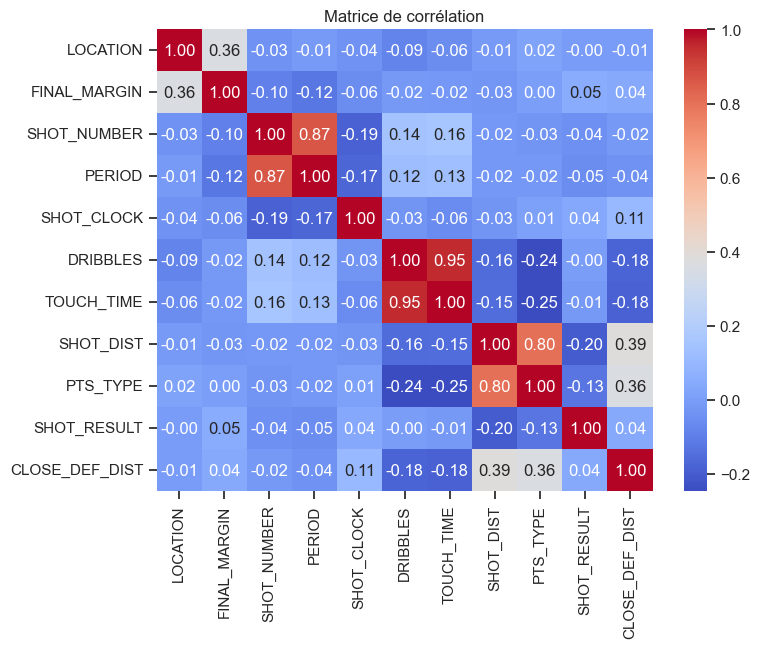

In [98]:
corr_matrix = df_curry.corr(numeric_only=True)

corr_matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


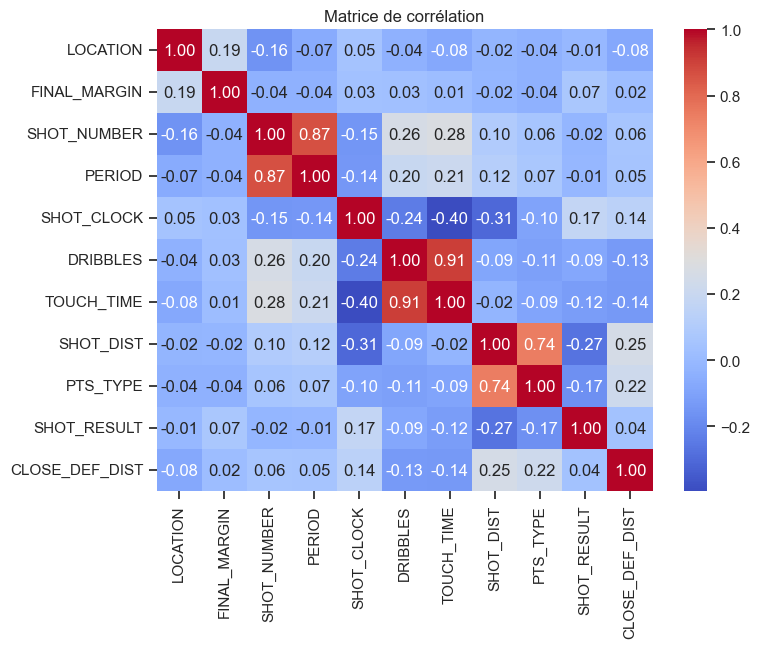

In [99]:
corr_matrix = df_lebron.corr(numeric_only=True)

corr_matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()
